<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/Hierarichal-Convolutional-Neural-Network-for-fashion-Image-Classification/blob/master/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing VGGNET-19 on FashioMNIST 

>FashionMNIST is a dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28*28 grayscale images, associated with a lable from 10 classes.

In this work, the pre-trained model VGG19.

Requirements:
>1. google colab(GPU)
2. dataset(fashion MNIST)

### 1. load data

In [0]:
import numpy as np
import pandas as pd


data_train = pd.read_csv('drive/My Drive/dataset/fashion-mnist_train.csv')
data_test = pd.read_csv('drive/My Drive/dataset/fashion-mnist_test.csv')

>note:
1. I have loaded .csv files of fashionMNIST dataset from the google drive.
2. While executing kindly adjust the path accordingly.

In [0]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train.shape, data_test.shape

((60000, 785), (10000, 785))

### 2. Pre-processing data
> ##### a  
Images and labels

In [0]:
from keras.utils import to_categorical
# X = training images, y =training labels
 
X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

# X_test = test images, y_test = test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

>note:
1. iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected.
2. One hot encoding is applied on y, y_test using to_categorical() which is avail with in the keras.utils( tensorflow backend).

In [0]:
# look at the shape of the dataframes
X.shape, X_test.shape, y.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

> ##### b
 The images of the fashionMNIST are black and white, while the required input for VGG19 must be colored image. Thus covert the images into colored one with 3 channes R, G, B.

In [0]:
X = np.dstack([X] * 3)
X_test = np.dstack([X_test] * 3)

X.shape, X_test.shape

((60000, 784, 3), (10000, 784, 3))

> ##### c
Reshape the images into tensor format as required by TensoFlow

In [0]:
X = X.reshape(-1, 28, 28, 3)
X_test = X_test.reshape(-1, 28, 28, 3)

X.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

> ##### d
VGG19 requires min input image's width and height of 48.

In [0]:

from keras.preprocessing.image import img_to_array, array_to_img

X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])

X.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

> ##### e
pre-process the images by reshaping and scaling them so that all values are in the [0, 1] interval.

In [0]:
X = X.astype('float32')
X /= 255

X_test = X_test.astype('float32')
X_test /= 255

### 3. Split the data
> The original training data (60k images) is split into 80% of training(48k images) and 20% of validation (12k images), to finally evaluate the accuracy of the model on the data it has never seen. This helps to see whether overfitting the training data or not?. Whether i should lower the learning rate and train more epochs if validation accuracy is higher than traning accuracy or stop over-training if training accuracy shift higher than the validation. 


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =  0.2, random_state = 50)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

### 4. VGG19

In [0]:
from keras.applications import VGG19

vgg19 = VGG19(weights = 'imagenet', include_top = False, input_shape = (48,48,3), classes = 10)

> note: Passed arguments are
1. weights specifies the weeight checkpoint fromwhich to intitialize the model.
2. include_top  refers to including(or not) the densely connected classifier on top of the network. By default, this densely connected classifer corresponds to the 1000 classes from ImageNet. As in this were are different densely connected classifier with only 10 classes, so no need to include it
3. input_shape(optional), only to be included if include_top is false
4. classes(optional), no of classes to classify images.

In [0]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

### 5. Feature extraction
> feature extraction consists of represetations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

> CNNs used for image classification comprise two parts; 
1. start with a series of pooling and convolution layers(CONVOLUTIONAL BASE)
2. end with a densely connected classifer.

> In case of covnets, 'feature extraction' will simply consist of taking the convolutional base of previously trained network, running the new data through it and training a new classifier on top of the output.

> why only reuse the convolutional base? could we reuse the densely connected classifier as well? In general, it should be avoided. The reason is simple that the representations learned by the convolutional base are likely to be more generic(common) and therfore more reusable, the feature maps of a covnet are presence maps of generic(common) concpets over a picture which is likely useful regardless of the problem.

>Representaations learned by the classifier will necessarily be very specific to the set of classes that the model was trained on, they will only contain information abou the presence probability of a class in the entire picture. Aditionally representations found in densely connected layers no longer contan any information about where objects are located in the input image, these layers get rid of the notion of space, whereas the object locaton is still described by convolutional feature maps. For objects where object location matters, densely connected features woulld be useless.




In [0]:
from keras.applications.vgg19 import preprocess_input

#pre processing the input
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)


>Now inorder to extract features from the FashionMNIST data:
1. Run the convolutional base over the dataset
2. Record its output to a numpy array on disk
3. Use this data as input to a standalone densely connected classifer.

In [0]:
# feature extraction

train_features = vgg19.predict(np.array(X_train), batch_size = 16, verbose =1)
val_features = vgg19.predict(np.array(X_val), batch_size = 16, verbose =1)
test_features = vgg19.predict(np.array(X_test), batch_size = 16, verbose =1)


10000/10000 [==============================] - 8s 822us/step


In [0]:
# shape of features

train_features.shape, val_features.shape, test_features.shape 

((48000, 1, 1, 512), (12000, 1, 1, 512), (10000, 1, 1, 512))

> note: The extracted featires are currently of shape (samples, 1, 1, 512). 

>Feed them to a densely connected classifer, before that flatten them.

In [0]:
# flatten extracted features

train_features = np.reshape(train_features, (48000, 1*1*512))
val_features = np.reshape(val_features, (12000, 1*1*512))
test_features = np.reshape(test_features, (10000, 1*1*512))

# shape of features

train_features.shape, val_features.shape, test_features.shape 

((48000, 512), (12000, 512), (10000, 512))

> Define desenly connected classifer

In [0]:
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# adding Dense and Dropout layers on top of VGG19

model = models.Sequential()
model.add(layers.Dense(4096, activation = 'relu', input_dim = 1*1*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

> note: To prevent overfitting, dropout reeguarization is processed between fully-connected layers. In prediction block 4096 channels are divided into 10 classes using softmax activation function

In [0]:
import keras

#compile the model

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

> note:  When compiling the model, I choose categorical_crossentropy as the loss function (which is relevent for multiclass, single-label classification problem) and Adam optimizer.
1. The cross-entropy loss calculates the error rate between the predicted value and the original value. Categorical is used because there are 10 classes to predict from. If there were 2 classes we can use binary_crossentropy.
2. The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight.


### 6. Train the model 

In [0]:
history1 = model.fit(train_features, y_train, batch_size = 256, epochs = 100, verbose = 1, validation_data=(val_features, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 28us/step - loss: 2.3180 - accuracy: 0.2859 - val_loss: 1.5431 - val_accuracy: 0.4397
Epoch 2/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.4703 - accuracy: 0.4697 - val_loss: 1.3274 - val_accuracy: 0.5265
Epoch 3/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.3307 - accuracy: 0.5176 - val_loss: 1.2786 - val_accuracy: 0.5334
Epoch 4/100
48000/48000 [==============================] - 1s 25us/step - loss: 1.2554 - accuracy: 0.5461 - val_loss: 1.1853 - val_accuracy: 0.5857
Epoch 5/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.2127 - accuracy: 0.5586 - val_loss: 1.1266 - val_accuracy: 0.6183
Epoch 6/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.1774 - accuracy: 0.5723 - val_loss: 1.1015 - val_accuracy: 0.6267
Epoch 7/100
48000/48000 [==============================] - 1s 

In [0]:
score1 = model.evaluate(test_features, y_test, verbose = 0)
print('Test loss:',score1[0])
print('Test accuracy:',score1[1])

Test loss: 0.792193456363678
Test accuracy: 0.727400004863739


In [0]:
history2 = model.fit(train_features, y_train, batch_size = 128, epochs = 50, verbose = 1, validation_data=(val_features, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0466 - accuracy: 0.6174 - val_loss: 0.9042 - val_accuracy: 0.6833
Epoch 2/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0355 - accuracy: 0.6215 - val_loss: 0.8822 - val_accuracy: 0.6944
Epoch 3/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0495 - accuracy: 0.6145 - val_loss: 0.8617 - val_accuracy: 0.7028
Epoch 4/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0438 - accuracy: 0.6204 - val_loss: 0.8454 - val_accuracy: 0.7004
Epoch 5/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0306 - accuracy: 0.6231 - val_loss: 0.8274 - val_accuracy: 0.7141
Epoch 6/50
48000/48000 [==============================] - 2s 44us/step - loss: 1.0241 - accuracy: 0.6278 - val_loss: 0.8256 - val_accuracy: 0.7128
Epoch 7/50
48000/48000 [==============================] - 2s 44us/st

In [0]:
score2 = model.evaluate(test_features, y_test, verbose = 0)
print('Test loss:',score2[0])
print('Test accuracy:',score2[1])

Test loss: 0.8155799748420716
Test accuracy: 0.7142000198364258


In [0]:
history3 = model.fit(train_features, y_train, batch_size = 64, epochs = 50, verbose = 1, validation_data=(val_features, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 80us/step - loss: 1.1163 - accuracy: 0.5855 - val_loss: 0.8680 - val_accuracy: 0.7078
Epoch 2/50
48000/48000 [==============================] - 4s 80us/step - loss: 1.1157 - accuracy: 0.5898 - val_loss: 0.8682 - val_accuracy: 0.7021
Epoch 3/50
48000/48000 [==============================] - 4s 83us/step - loss: 1.1156 - accuracy: 0.5913 - val_loss: 0.8637 - val_accuracy: 0.7035
Epoch 4/50
48000/48000 [==============================] - 4s 85us/step - loss: 1.0946 - accuracy: 0.5960 - val_loss: 0.9096 - val_accuracy: 0.6754
Epoch 5/50
48000/48000 [==============================] - 4s 85us/step - loss: 1.0930 - accuracy: 0.5969 - val_loss: 0.8713 - val_accuracy: 0.7019
Epoch 6/50
48000/48000 [==============================] - 4s 85us/step - loss: 1.0971 - accuracy: 0.5965 - val_loss: 0.8727 - val_accuracy: 0.6892
Epoch 7/50
48000/48000 [==============================] - 4s 81us/st

In [0]:
score3 = model.evaluate(test_features, y_test, verbose = 0)
print('Test loss:',score3[0])
print('Test accuracy:',score3[1])

Test loss: 0.8386492921829224
Test accuracy: 0.717199981212616


### 7. Results

>note: only batch_size hyperparameter is tuned over different values as appear in results.

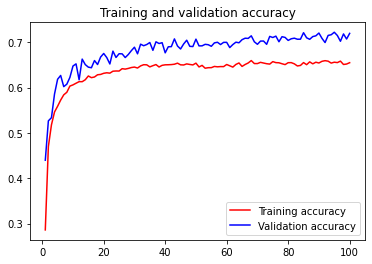

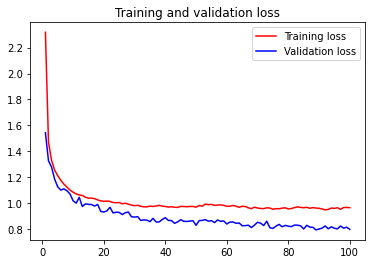

In [0]:
# plot the loss and accuracy

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.title('Training and validation accuracy')
plt.plot(epochs, accuracy, 'red', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

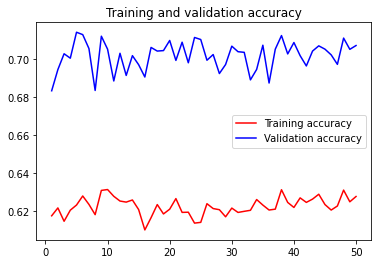

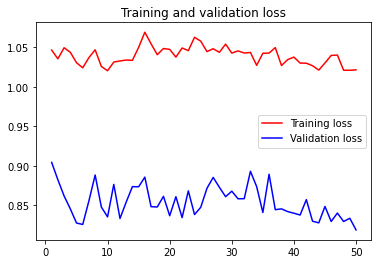

In [0]:
# plot the loss and accuracy

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.title('Training and validation accuracy')
plt.plot(epochs, accuracy, 'red', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

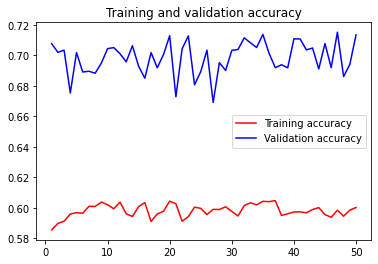

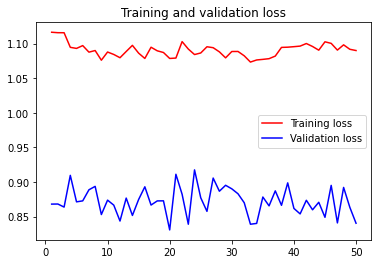

In [0]:
# plot the loss and accuracy

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.title('Training and validation accuracy')
plt.plot(epochs, accuracy, 'red', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()